<a href="https://colab.research.google.com/github/Jinseok2419342/2025-1-myclass-BDA/blob/main/inclass/09w_A_mon_0512_easy_ch07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 9주차 수업

## 결측값 제거하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.DataFrame({'sex'   : ['M', 'F', np.nan, 'M', 'F'],
                   'score' : [5, 4, 3, 4, None]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [3]:
df.dropna()

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [4]:
df.dropna(axis=0)

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [5]:
df.dropna(axis=1)

""
0
1
2
3
4


In [6]:
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [7]:
df.dropna(subset = ['score'])

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [8]:
df.dropna(subset = ['score'], axis=0)

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [9]:
df_no = df.dropna(subset = ['score'])
df_no

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [10]:
df_no['score'] + 1

,score
0,6.0
1,5.0
2,4.0
3,5.0


In [11]:
df_no = df.dropna(subset = ['score', 'sex'])
df_no

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [12]:
df.score.mean()

np.float64(4.0)

In [13]:
df['score'].sum()

np.float64(16.0)

In [14]:
df.groupby('sex').agg(mean_score = ('score', 'mean'),
                      sum_score = ('score', 'sum'))

,mean_score,sum_score
sex,,
F,4.0,4.0
M,4.5,9.0


In [15]:
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [17]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip'],
                   "born": [np.nan, pd.Timestamp("1940-04-25"), pd.NaT]})
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [18]:
df.isna()

,name,toy,born
0,False,True,True
1,False,False,False
2,False,False,True


In [19]:
df.dropna()

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [20]:
df.dropna(axis=1)

,name
0,Alfred
1,Batman
2,Catwoman


In [21]:
df.dropna(axis='columns')

,name
0,Alfred
1,Batman
2,Catwoman


In [22]:
df.dropna(how='any')

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [23]:
df.dropna(how='all')

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [24]:
df.dropna(thresh=2)

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [25]:
df.dropna(thresh=1)

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [26]:
df.dropna(thresh=3)

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [27]:
df.dropna(subset = ['name', 'toy'])

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [28]:
df.dropna(subset = ['name', 'born'])

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [29]:
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [30]:
df.dropna(subset = ['born'])

,name,toy,born
1,Batman,Batmobile,1940-04-25


### 빈 데이터프레임 확인 방법 : 속성 empty

In [32]:
df1 = pd.DataFrame()
df1

""


In [33]:
df1.empty

True

In [34]:
df1 = pd.DataFrame(index= ['row1', 'row2', 'row3'])
df1

""
row1
row2
row3


In [35]:
df1.empty

True

In [43]:
df1 = pd.DataFrame(columns= ['col1', 'col2', 'col3'])
df1

,col1,col2,col3


In [44]:
df1.empty

True

In [45]:
df1 = pd.DataFrame(index= ['row1', 'row2', 'row3'],
                   columns= ['col1', 'col2', 'col3'])
df1

,col1,col2,col3
row1,NaN,NaN,NaN
row2,NaN,NaN,NaN
row3,NaN,NaN,NaN


In [46]:
df1.empty

False

In [47]:
df1 = pd.DataFrame(100, # data
                   index   = ['row1', 'row2', 'row3'],
                   columns = ['col1', 'col2', 'col3'])
df1

,col1,col2,col3
row1,100,100,100
row2,100,100,100
row3,100,100,100


In [48]:
df1.empty

False

## 결측 값 대체

In [49]:
!git clone https://github.com/ai7dnn/data

Cloning into 'data'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 33 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (33/33), 2.17 MiB | 3.83 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [50]:
exam = pd.read_csv('data/exam.csv')
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [51]:
exam.loc[[2, 7, 14], ['math']] = np.nan
exam.loc[[2, 7, 14]]

,id,nclass,math,english,science
2,3,1,NaN,86,78
7,8,2,NaN,78,25
14,15,4,NaN,56,78


In [52]:
exam.isna().sum().sum()

np.int64(3)

In [53]:
exam.loc[[2, 7, 14], ['math']]

,math
2,NaN
7,NaN
14,NaN


### 결측값 채워넣기 fillna()

In [56]:
exam['math'].fillna(100)

,math
0,50.0
1,60.0
2,100.0
3,30.0
4,25.0
5,50.0
6,80.0
7,100.0
8,20.0
9,50.0


In [57]:
exam['math'] = exam['math'].fillna(100)
exam.loc[[2, 7, 14]]

,id,nclass,math,english,science
2,3,1,100.0,86,78
7,8,2,100.0,78,25
14,15,4,100.0,56,78


In [59]:
exam.loc[[2, 7, 14], ['math']] = np.nan
exam.loc[[2, 7, 14]]

,id,nclass,math,english,science
2,3,1,NaN,86,78
7,8,2,NaN,78,25
14,15,4,NaN,56,78


In [60]:
exam.math.mean()

np.float64(55.23529411764706)

In [61]:
exam['math'] = exam['math'].fillna(exam['math'].mean())
exam.loc[[2, 7, 14]]

,id,nclass,math,english,science
2,3,1,55.235294,86,78
7,8,2,55.235294,78,25
14,15,4,55.235294,56,78


In [62]:
pd.set_option('display.precision', 2)
exam.loc[[2, 7, 14]]

,id,nclass,math,english,science
2,3,1,55.24,86,78
7,8,2,55.24,78,25
14,15,4,55.24,56,78


In [63]:
exam.math.isna().sum()

np.int64(0)

In [64]:
df = pd.DataFrame({'sex'   : [1, 2, 1, 3, 2, 1],
                   'score' : [5, 4, 3, 4, 2, 6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [65]:
df['sex'].value_counts()

,count
sex,
1,3
2,2
3,1


In [66]:
df['sex'].value_counts().sort_index()

,count
sex,
1,3
2,2
3,1


In [67]:
df['sex'].value_counts().sort_values()

,count
sex,
3,1
2,2
1,3


In [68]:
df['score'].value_counts()

,count
score,
4,2
5,1
3,1
2,1
6,1


In [69]:
df['score'].value_counts().sort_index()

,count
score,
2,1
3,1
4,2
5,1
6,1


In [70]:
df['score'].value_counts().sort_values()

,count
score,
5,1
3,1
2,1
6,1
4,2


In [71]:
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [72]:
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [73]:
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [74]:
df.groupby('sex').agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [75]:
df.dropna(subset = ['sex', 'score'])

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
4,2.0,2.0


In [76]:
df.dropna(subset = ['sex', 'score']).groupby('sex').agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [77]:
df = pd.DataFrame([1])
df

,0
0,1


In [78]:
df = pd.DataFrame([1, 1, 2, 2])
df

,0
0,1
1,1
2,2
3,2


In [79]:
df = pd.DataFrame([[1, 1, 2, 2]])
df

,0,1,2,3
0,1,1,2,2


In [80]:
df = pd.DataFrame([[1, 1, 2, 2], [10,20,30,40]])
df

,0,1,2,3
0,1,1,2,2
1,10,20,30,40


In [81]:
df = pd.DataFrame({'x1': [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 10, np.nan)
df

,x1,x2
0,1,10.0
1,1,10.0
2,2,NaN
3,2,NaN


In [82]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


In [83]:
df = pd.DataFrame({'x1': [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 'a', None)
df

,x1,x2
0,1,a
1,1,a
2,2,None
3,2,None


In [84]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


In [86]:
df = df.fillna(100)
df

,x1,x2
0,1,a
1,1,a
2,2,100
3,2,100


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x1      4 non-null      int64 
 1   x2      2 non-null      object
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes


## 이상값(outlier) 알아보기

In [87]:
mpg = pd.read_csv('data/mpg.csv')
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
227,volkswagen,passat,1.8,1999,4,manual(m5),f,21,29,p,midsize
220,volkswagen,jetta,2.8,1999,6,manual(m5),f,17,24,r,compact
137,mercury,mountaineer 4wd,4.0,1999,6,auto(l5),4,14,17,r,suv
233,volkswagen,passat,3.6,2008,6,auto(s6),f,17,26,p,midsize
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


In [88]:
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.00,234.00,234.00,234.00,234.00
mean,3.47,2003.50,5.89,16.86,23.44
std,1.29,4.51,1.61,4.26,5.95
min,1.60,1999.00,4.00,9.00,12.00
25%,2.40,1999.00,4.00,14.00,18.00
50%,3.30,2003.50,6.00,17.00,24.00
75%,4.60,2008.00,8.00,19.00,27.00
max,7.00,2008.00,8.00,35.00,44.00


In [89]:
%config InlineBackend.figure_format = 'retina'

In [90]:
mpg.hwy.describe()

,hwy
count,234.00
mean,23.44
std,5.95
min,12.00
25%,18.00
50%,24.00
75%,27.00
max,44.00


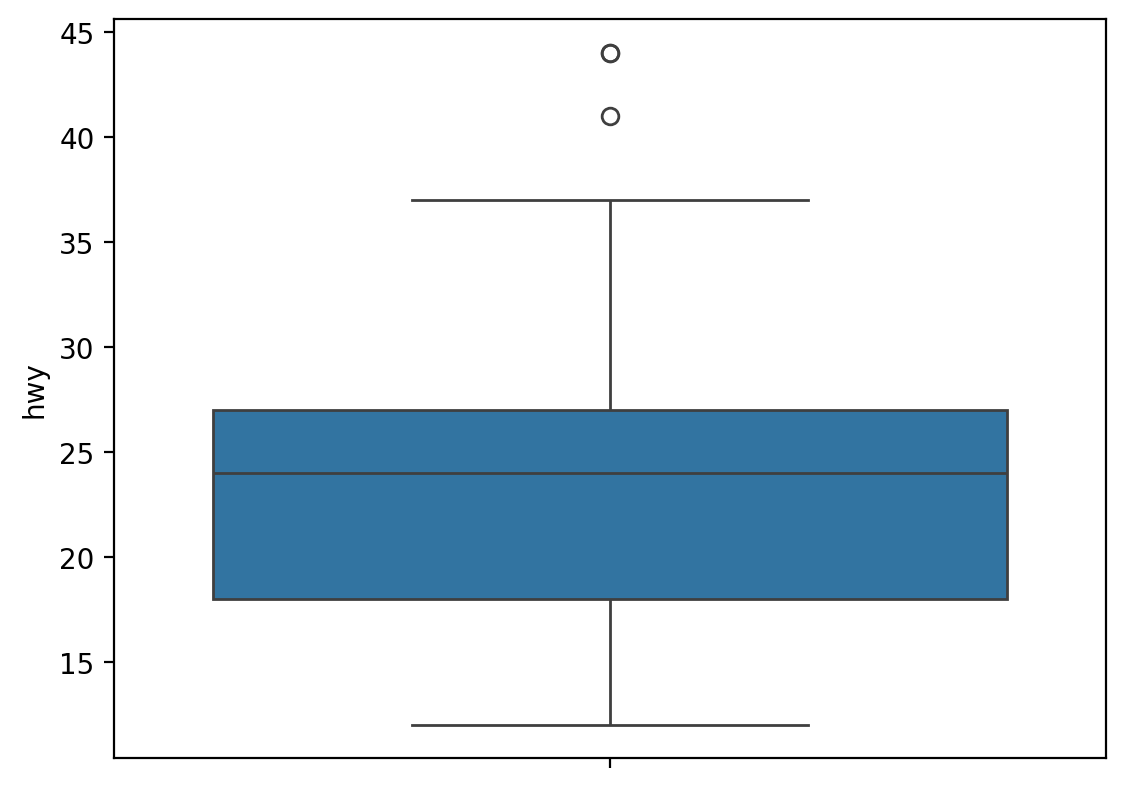

In [91]:
import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy');

In [92]:
s = pd.Series([1, 2, 3, 4, 5])
s

,0
0,1
1,2
2,3
3,4
4,5


In [93]:
s.quantile()

np.float64(3.0)

In [94]:
s.quantile(.5)

np.float64(3.0)

In [95]:
s.quantile([.1, .2, .25, .5, .75])

,0
0.10,1.4
0.20,1.8
0.25,2.0
0.50,3.0
0.75,4.0


In [96]:
mpg.hwy.describe()

,hwy
count,234.00
mean,23.44
std,5.95
min,12.00
25%,18.00
50%,24.00
75%,27.00
max,44.00


In [97]:
mpg.hwy.quantile([.25, .5, .75])

,hwy
0.25,18.0
0.50,24.0
0.75,27.0


In [99]:
a, b = 10, 20
a

10

In [100]:
b

20

In [101]:
p25, p50, p75 = mpg.hwy.quantile([.25, .5, .75])

In [103]:
iqr = p75 - p25
iqr

9.0

In [104]:
## upper fence
UF = p75 + 1.5 * iqr
UF

40.5

In [105]:
## lower fence
LF = p25 - 1.5 * iqr
LF

4.5

In [106]:
mpg.hwy.describe()

,hwy
count,234.00
mean,23.44
std,5.95
min,12.00
25%,18.00
50%,24.00
75%,27.00
max,44.00


In [107]:
mpg.hwy.describe()['50%']

np.float64(24.0)

In [108]:
mpg[ mpg.hwy > UF ][['hwy']]

,hwy
212,44
221,44
222,41


In [109]:
mpg[ mpg.hwy > UF ]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


<Axes: ylabel='hwy'>

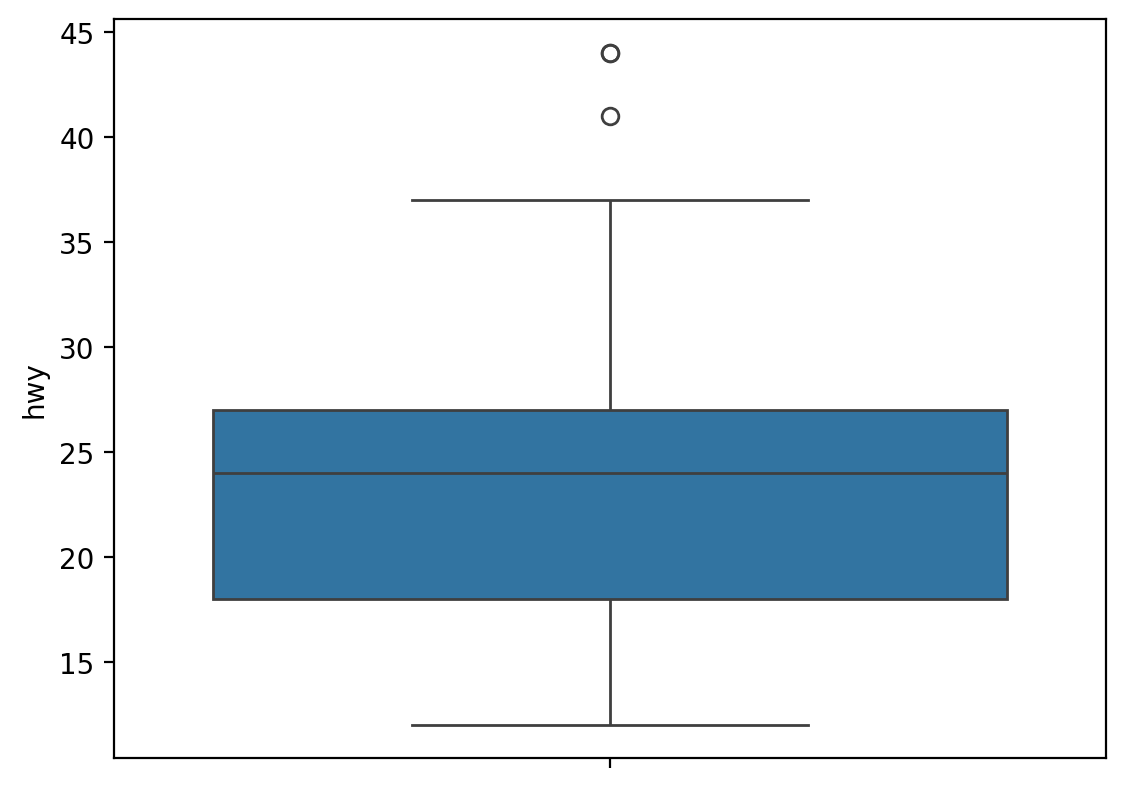

In [111]:
sns.boxplot(data=mpg, y='hwy')

In [112]:
mpg[ mpg.hwy > UF ][['hwy']]

,hwy
212,44
221,44
222,41


In [110]:
mpg[ mpg.hwy < LF ]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category


In [113]:
mpg.isna().sum()

,0
manufacturer,0
model,0
displ,0
year,0
cyl,0
trans,0
drv,0
cty,0
hwy,0
fl,0


In [136]:
mpg[ (mpg['hwy'] > UF) | (mpg['hwy'] < LF) ]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


In [137]:
mpg[ (mpg['hwy'] > UF) | (mpg['hwy'] < LF) ] ['hwy']

,hwy
212,44
221,44
222,41


In [138]:
mpg['hwy'] = np.where((mpg.hwy < LF) | (mpg.hwy > UF), np.nan, mpg['hwy'])
mpg[ mpg.hwy.isna() ]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,NaN,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,NaN,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,NaN,d,subcompact


In [139]:
mpg.shape

(234, 11)

In [140]:
len(mpg)

234

In [141]:
dmpg = mpg.dropna(subset=['hwy'])
len(dmpg)

231

In [142]:
dmpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.17
f,27.73
r,21.00


In [143]:
mpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.17
f,27.73
r,21.00


In [144]:
mpg.isna().sum().sum()

np.int64(3)

In [145]:
mpg = pd.read_csv('data/mpg.csv')
mpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.17
f,28.16
r,21.00


In [147]:
mpg.isna().sum().sum()

np.int64(0)

In [146]:
mpg[ (mpg['hwy'] > UF) | (mpg['hwy'] < LF) ] ['hwy']

,hwy
212,44
221,44
222,41


## 7장 종료

# 8장 그래프

In [2]:
!pip install koreanize_matplotlib

In [3]:
%config InlineBackend.figure_format = 'retina'

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
plt.rcParams.update({'figure.dpi': '100'})
plt.rcParams.update({'figure.figsize': [4, 2.5]})

In [6]:
mpg = pd.read_csv('data/mpg.csv')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


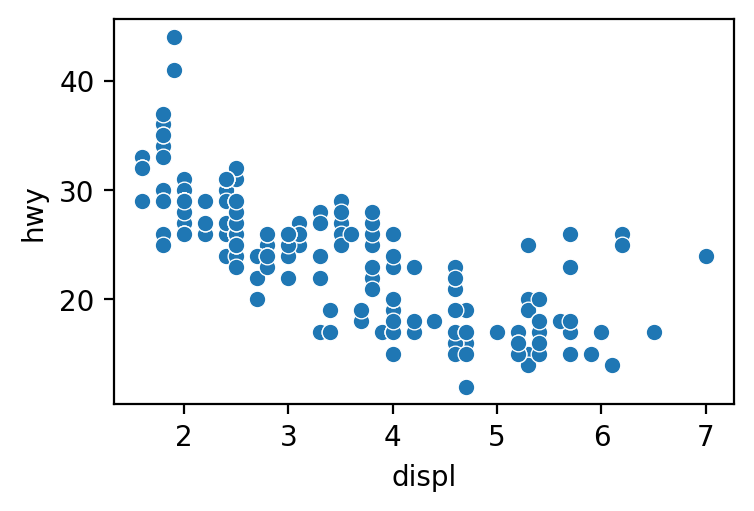

In [7]:
sns.scatterplot(data=mpg, x='displ', y='hwy');

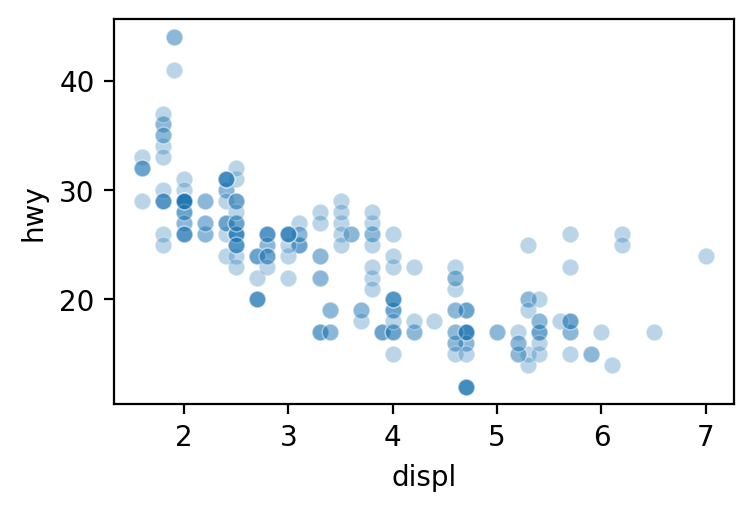

In [8]:
sns.scatterplot(data=mpg, x='displ', y='hwy', alpha=.3);

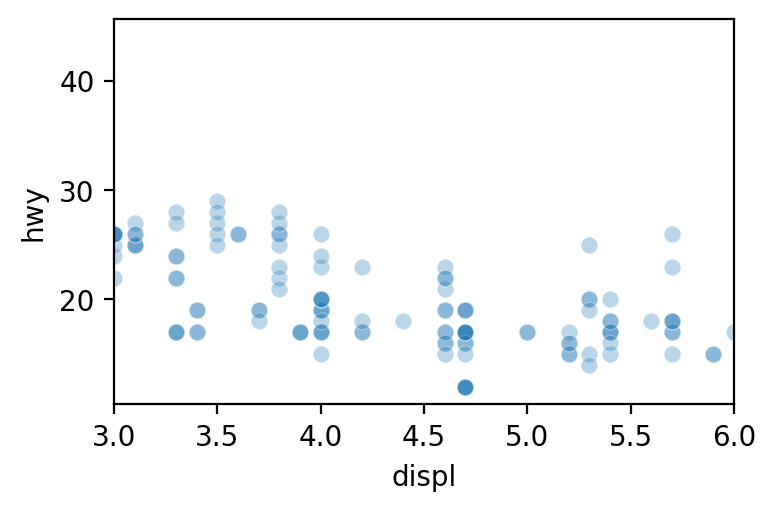

In [9]:
sns.scatterplot(data=mpg, x='displ', y='hwy', alpha=.3).set(xlim=[3, 6]);

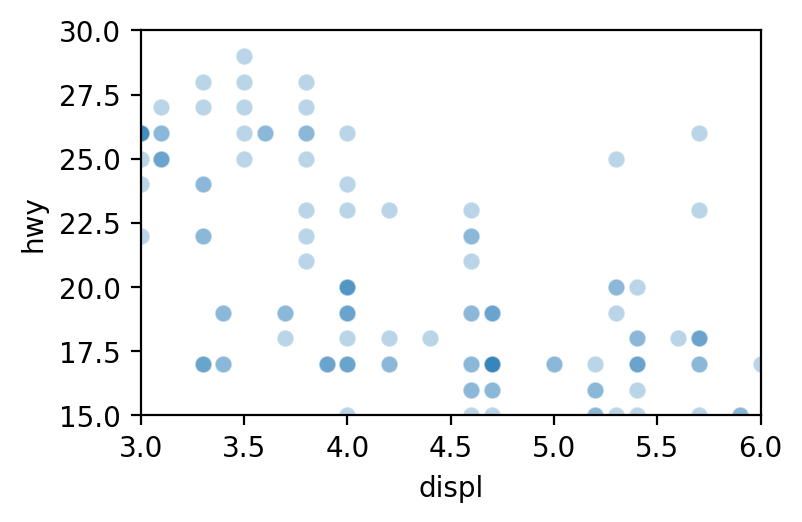

In [10]:
sns.scatterplot(data=mpg, x='displ', y='hwy', alpha=.3).set(xlim=[3, 6], ylim=[15, 30]);

<Axes: xlabel='displ', ylabel='hwy'>

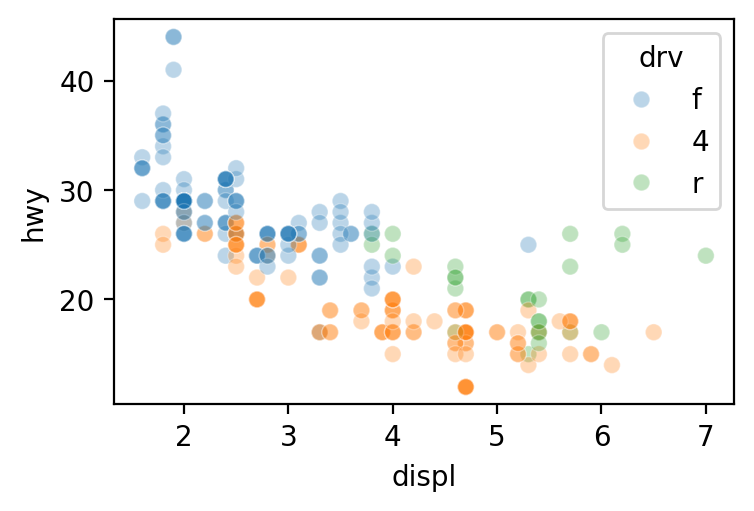

In [11]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'drv', alpha=.3)

<Axes: xlabel='displ', ylabel='hwy'>

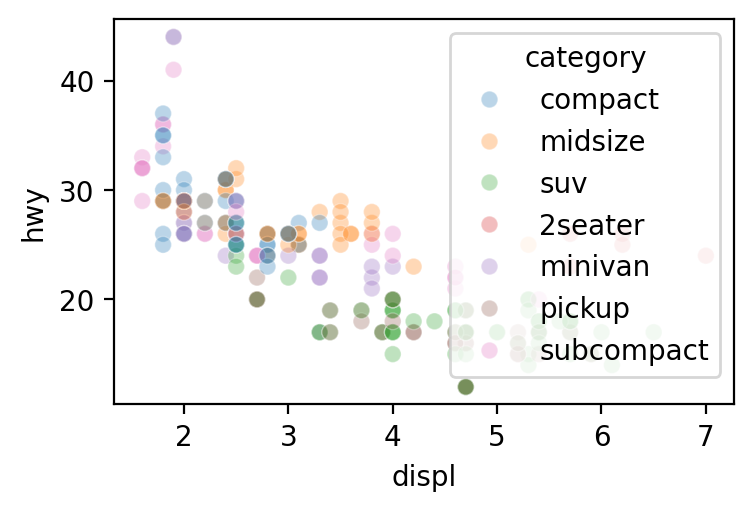

In [12]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'category', alpha=.3)

| `loc` 값 | 위치                       |
| ------- | ------------------------ |
| `0`     | 최적의 위치 (기본값, "best")     |
| `1`     | 오른쪽 위 ("upper right")    |
| `2`     | 왼쪽 위 ("upper left")      |
| `3`     | 왼쪽 아래 ("lower left")     |
| `4`     | 오른쪽 아래 ("lower right")   |
| `5`     | 가운데 ("center")           |
| `6`     | 왼쪽 가운데 ("center left")   |
| `7`     | 오른쪽 가운데 ("center right") |
| `8`     | 아래 가운데 ("lower center")  |
| `9`     | 위 가운데 ("upper center")   |
| `10`    | 그래프 중앙 ("center")        |


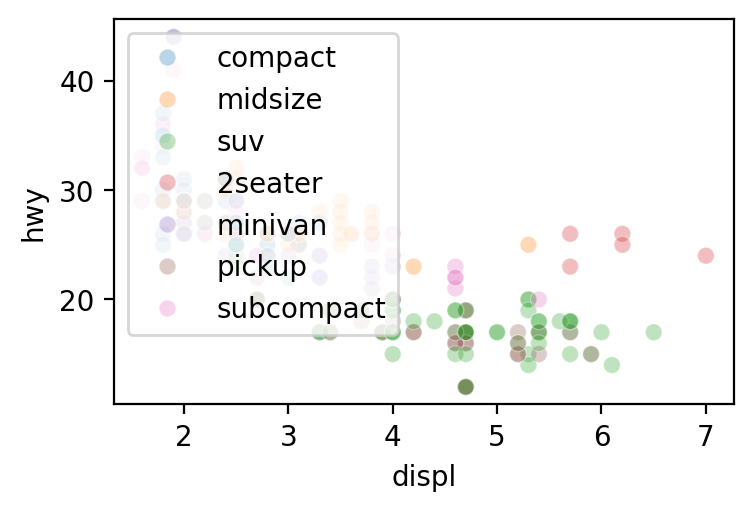

In [13]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'category', alpha=.3)
plt.legend(loc=2);

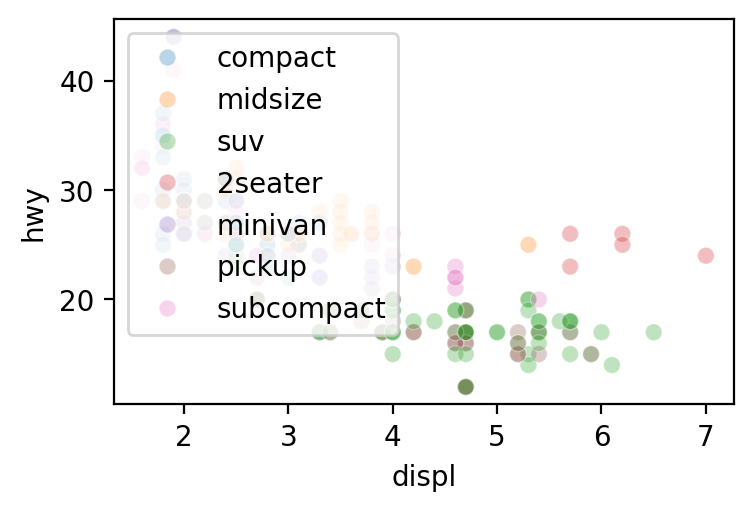

In [14]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'category', alpha=.3)
plt.legend(loc='upper left');

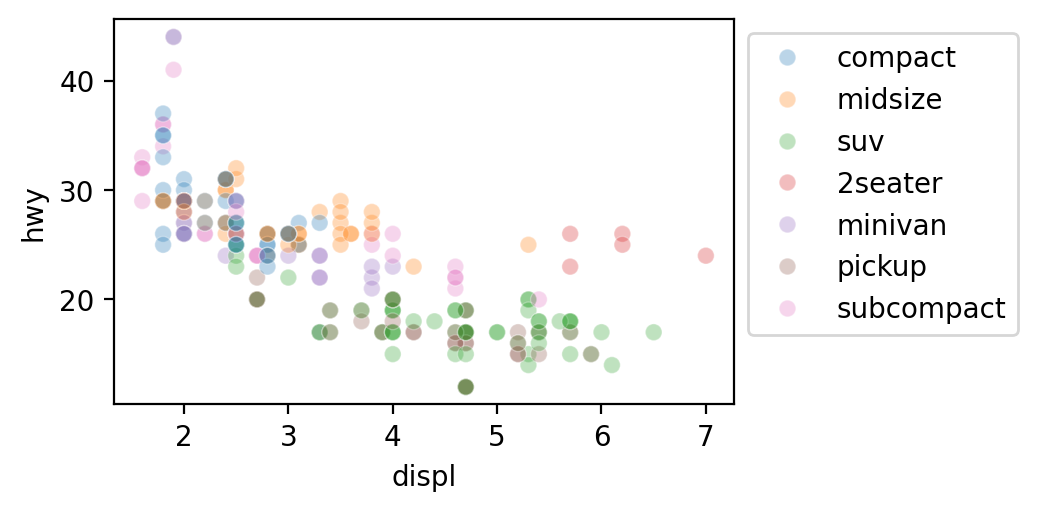

In [15]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'category', alpha=.3)
plt.legend(loc=2, bbox_to_anchor=(1, 1));

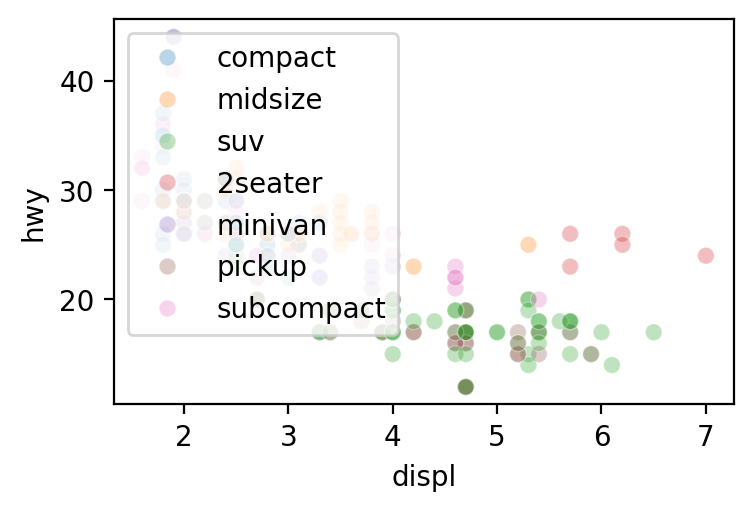

In [16]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'category', alpha=.3)
plt.legend(loc=2);

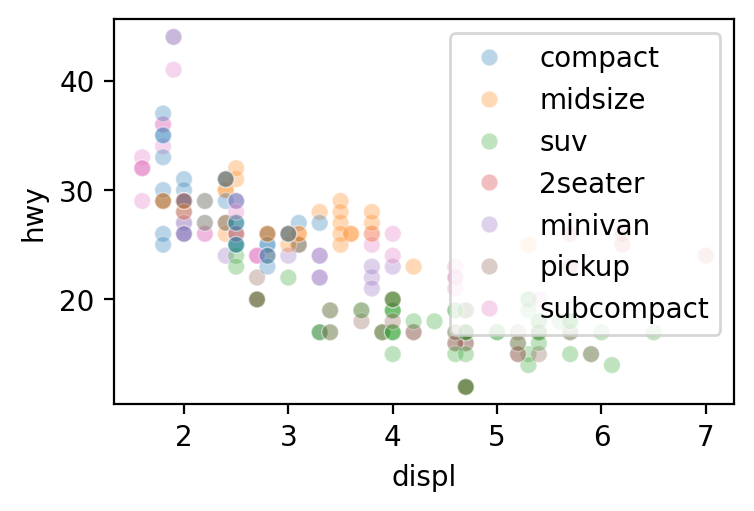

In [17]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'category', alpha=.3)
plt.legend(loc=1);

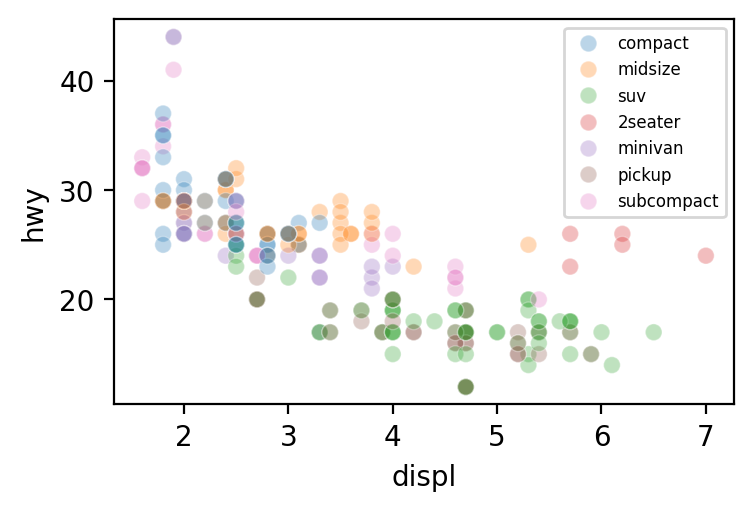

In [18]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'category', alpha=.3)
plt.legend(loc=1, fontsize='6');

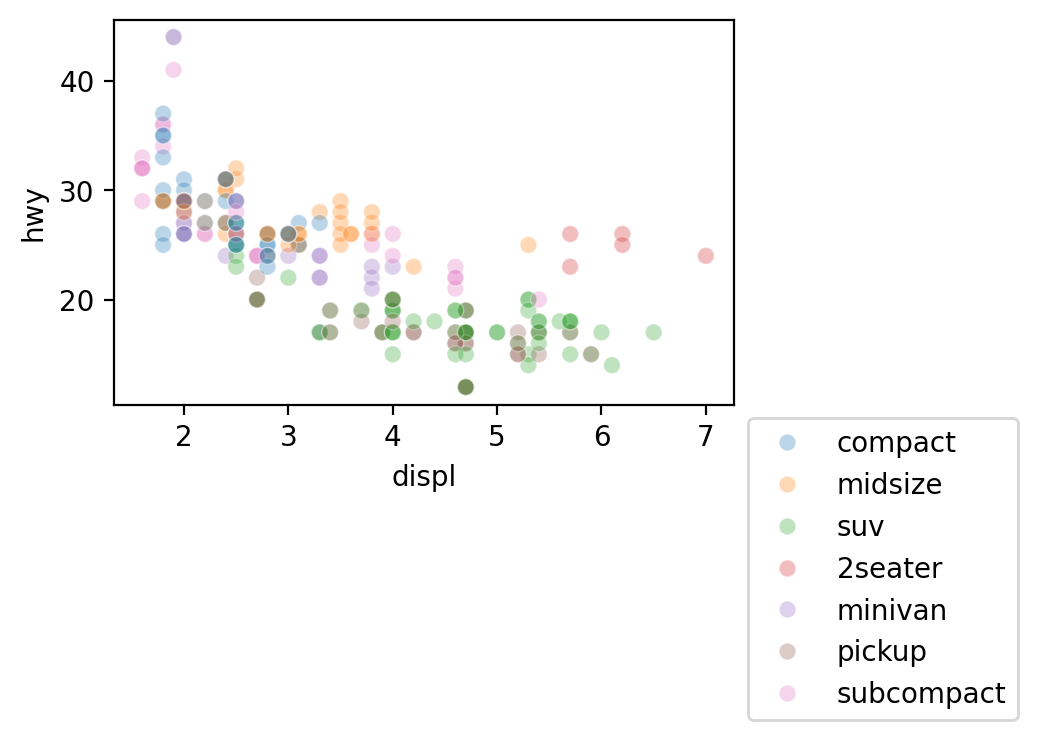

In [20]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'category', alpha=.3)
plt.legend(loc=2, bbox_to_anchor=(1,0));

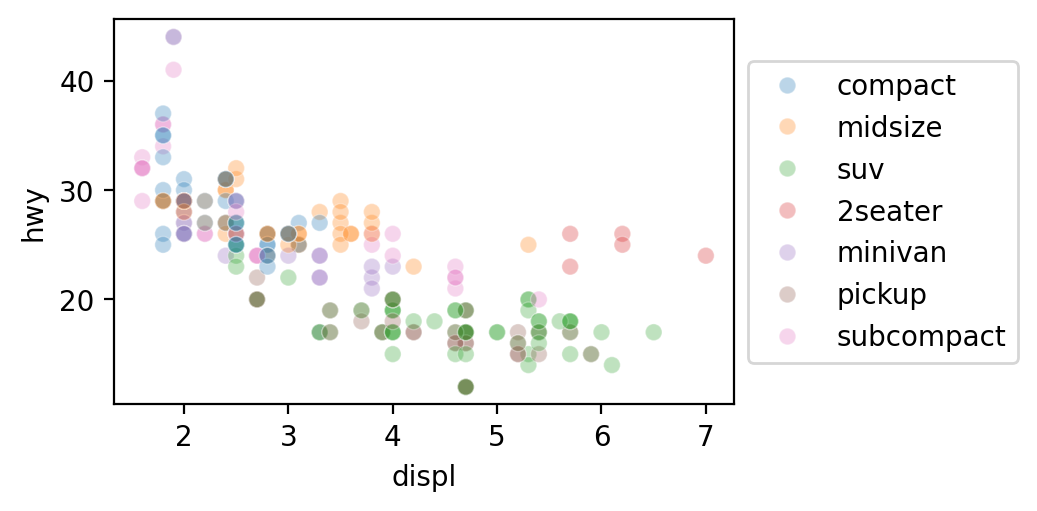

In [22]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'category', alpha=.3)
plt.legend(loc=6, bbox_to_anchor=(1, 0.5));

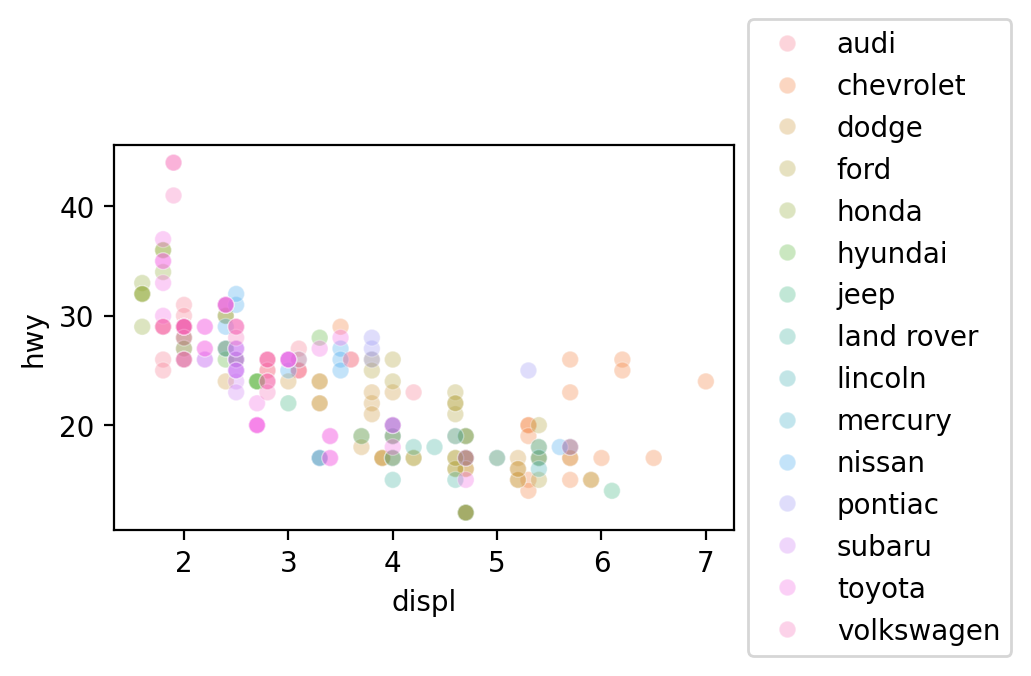

In [26]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'manufacturer', alpha=.3)
plt.legend(loc=6, bbox_to_anchor=(1, 0.5));

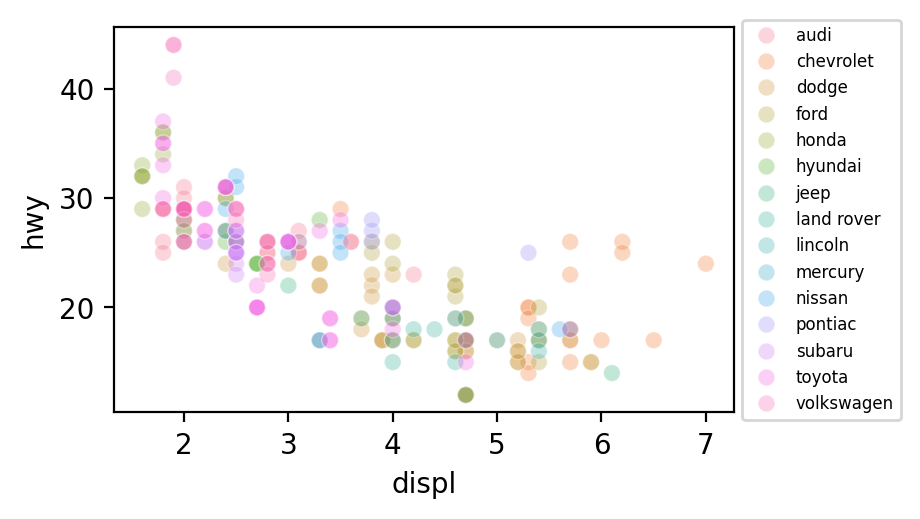

In [25]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'manufacturer', alpha=.3)
plt.legend(loc=6, bbox_to_anchor=(1, 0.5), fontsize=6);

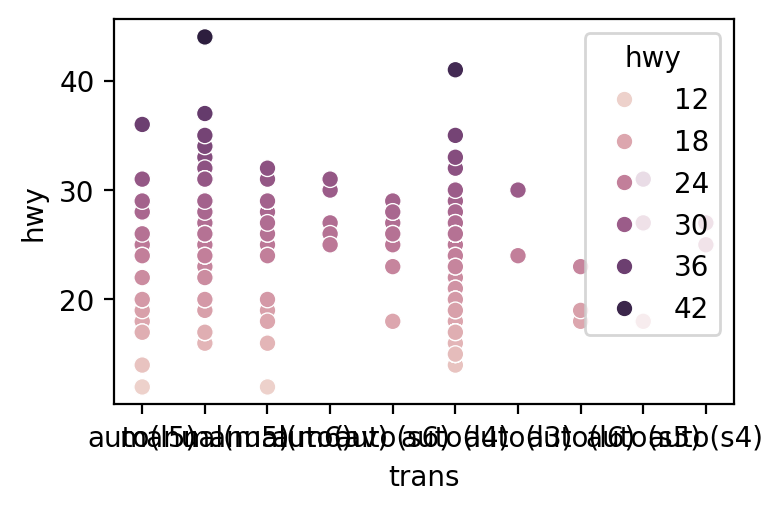

In [27]:
sns.scatterplot(data = mpg, x = 'trans', y = 'hwy', hue = 'hwy');

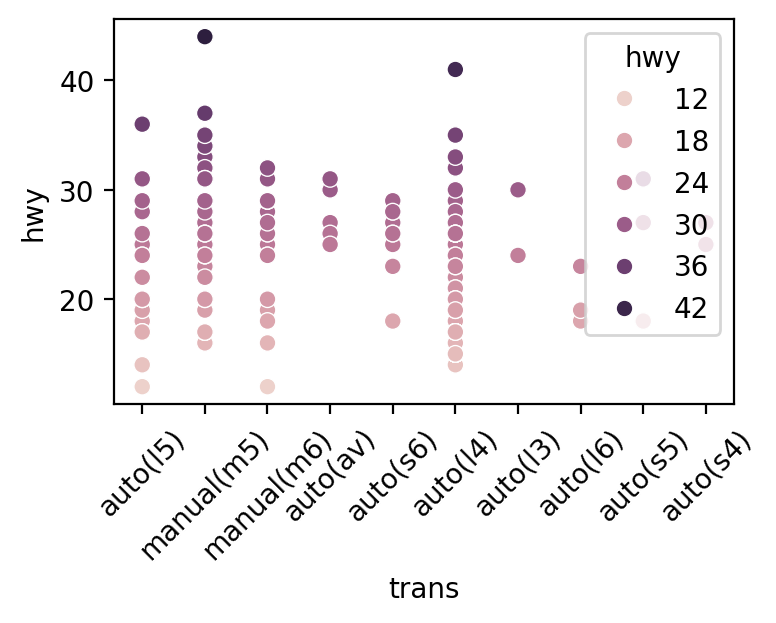

In [28]:
myPlot = sns.scatterplot(data = mpg, x = 'trans', y = 'hwy', hue = 'hwy');
myPlot.tick_params(axis='x', labelrotation=45);

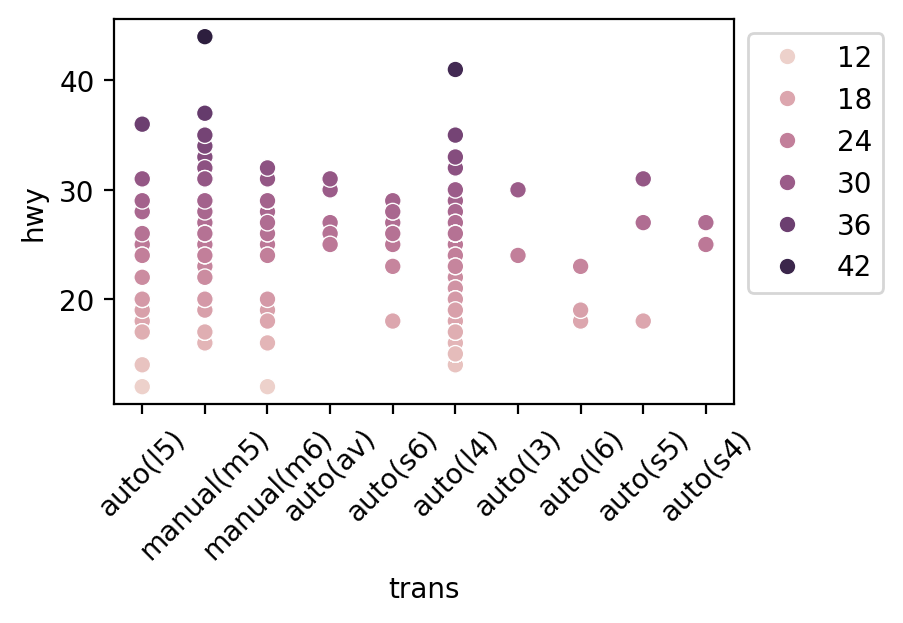

In [30]:
myPlot = sns.scatterplot(data = mpg, x = 'trans', y = 'hwy', hue = 'hwy');
myPlot.tick_params(axis='x', labelrotation=45);
myPlot.legend(loc=2, bbox_to_anchor=(1, 1));

## 종료